# Quick Start
Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

In [35]:
import numpy as np
import pandas as pd
from prophet import Prophet
from skforecast.datasets import fetch_dataset
import matplotlib.pyplot as plt
import plotly.express as px

We will use one of the datasets that are here: [datasets availables in skforecast](https://github.com/skforecast/skforecast-datasets). 

The selected data set it's "website_visits": Daily visits to the cienciadedatos.net website registered with the google analytics service.

In [2]:
df = fetch_dataset(name='website_visits', raw=True)
print(df.head())
print(df.shape)

website_visits
--------------
Daily visits to the cienciadedatos.net website registered with the google
analytics service.
Amat Rodrigo, J. (2021). cienciadedatos.net (1.0.0). Zenodo.
https://doi.org/10.5281/zenodo.10006330
Shape of the dataset: (421, 2)
     date  users
0  1/7/20   2324
1  2/7/20   2201
2  3/7/20   2146
3  4/7/20   1666
4  5/7/20   1433
(421, 2)


In [3]:
# Transform to datetime column date
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%y') # more information of formats: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
df.rename({'date': 'ds', 'users': 'y'}, axis = 1, inplace = True)
df.head()

,ds,y
0,2020-07-01,2324
1,2020-07-02,2201
2,2020-07-03,2146
3,2020-07-04,1666
4,2020-07-05,1433


In [36]:
# let's plot the timeseries
fig = px.line(df, x = 'ds', y = 'y', title='Visits')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


# First model using prophet

In [4]:
model = Prophet()
model.fit(df)

12:45:52 - cmdstanpy - INFO - Chain [1] start processing
12:45:52 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
# Python
future = model.make_future_dataframe(periods=15)
forecast = model.predict(future)

In [29]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
431,2021-09-05,1528.343667,464.239692,2656.721316
432,2021-09-06,2526.062923,1526.582001,3623.229275
433,2021-09-07,2777.742195,1790.771642,3811.630019
434,2021-09-08,2796.774225,1722.934455,3798.390562
435,2021-09-09,2743.601174,1686.049536,3843.504994


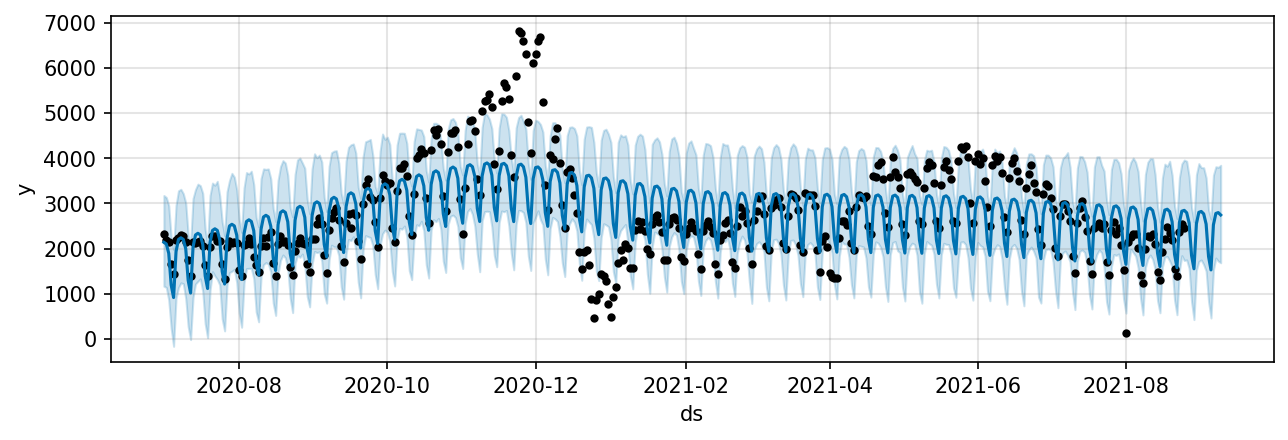

In [37]:
fig, ax = plt.subplots(dpi = 150, figsize = (10,3))
fig = model.plot(forecast, ax = ax)

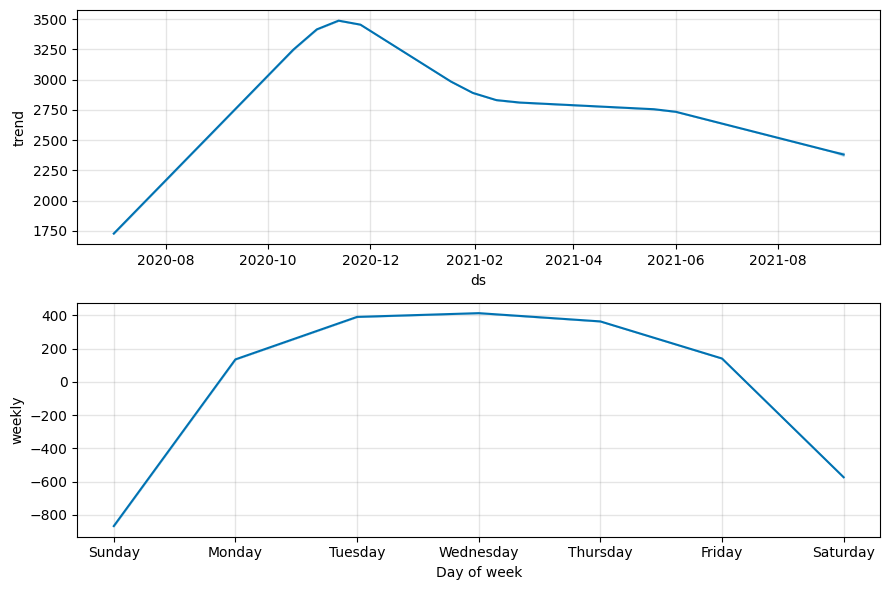

In [33]:
fig = model.plot_components(forecast)